In [51]:
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
!pip install 'scipy>=1.8'
!pip install 'networkx<2.7'
!pip install igraph
!pip install pandas==1.5.3
!pip install infomap

In [54]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from tqdm import tqdm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# ML models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Speed up hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import networkx as nx
import infomap

## Data Preparation

In [57]:
providers = pd.read_csv('providers.csv')
beneficiary = pd.read_csv('beneficiary.csv')
inpatients = pd.read_csv('inpatients.csv')

In [58]:
inpatients

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,DiagnosisCode_7,DiagnosisCode_8,DiagnosisCode_9,DiagnosisCode_10,ProcedureCode_1,ProcedureCode_2,ProcedureCode_3,ProcedureCode_4,ProcedureCode_5,ProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_temp = pd.merge(inpatients, providers, how = 'inner', left_on = 'PID', right_on = 'PID')
df = pd.merge(df_temp, beneficiary, how = 'inner', left_on = 'BID', right_on = 'BID')
df

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,2,1,2,2,2,19000,1068,100,20
4,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,2,1,1,2,2,17000,1068,1050,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE152832,CLM49682,2009-05-03,2009-05-06,PRV54063,3000,PHY386294,NaN,NaN,2009-05-03,...,1,1,1,2,2,2,3000,1068,710,330
40470,BENE153373,CLM53102,2009-05-28,2009-06-02,PRV54932,2000,PHY343021,PHY325388,NaN,2009-05-28,...,1,1,1,2,2,2,27000,2136,510,50
40471,BENE154457,CLM35582,2009-01-26,2009-01-29,PRV51424,6000,PHY351890,NaN,NaN,2009-01-26,...,2,2,2,2,2,2,6000,1068,1190,620
40472,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,2009-09-06,...,1,1,1,2,2,1,5000,1068,2670,360


In [60]:
df = df.dropna(subset=['AttendingPhysician'], axis = 0).reset_index(drop = True)

drop_list = ['DeductibleAmt', 'ProcedureCode_2', 'ProcedureCode_3', 'ProcedureCode_4', 'ProcedureCode_5', 'ProcedureCode_6']
df = df.drop(drop_list, axis = 1)

df['Procedure'] = df['ProcedureCode_1'].isnull().astype(int).replace({0:1, 1:0})
df = df.drop('ProcedureCode_1', axis = 1)

df

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Procedure
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,0
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,1
4,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40357,BENE152832,CLM49682,2009-05-03,2009-05-06,PRV54063,3000,PHY386294,NaN,NaN,2009-05-03,...,1,1,2,2,2,3000,1068,710,330,0
40358,BENE153373,CLM53102,2009-05-28,2009-06-02,PRV54932,2000,PHY343021,PHY325388,NaN,2009-05-28,...,1,1,2,2,2,27000,2136,510,50,1
40359,BENE154457,CLM35582,2009-01-26,2009-01-29,PRV51424,6000,PHY351890,NaN,NaN,2009-01-26,...,2,2,2,2,2,6000,1068,1190,620,0
40360,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,2009-09-06,...,1,1,2,2,1,5000,1068,2670,360,1


In [61]:
print(df.columns)

Index(['BID', 'CID', 'StartDt', 'EndDt', 'PID', 'AmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'AdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'DiagnosisCode_1', 'DiagnosisCode_2',
       'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5',
       'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8',
       'DiagnosisCode_9', 'DiagnosisCode_10', 'Fraud', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDisease', 'State', 'County', 'NumOfMonths_PartACov',
       'NumOfMonths_PartBCov', 'Chronic_Alzheimer', 'Chronic_Heartfailure',
       'Chronic_KidneyDisease', 'Chronic_Cancer', 'Chronic_ObstrPulmonary',
       'Chronic_Depression', 'Chronic_Diabetes', 'Chronic_IschemicHeart',
       'Chronic_Osteoporasis', 'Chronic_rheumatoidarthritis', 'Chronic_stroke',
       'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
       'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt',
   

# Dummy variable for Diagnosis

In [62]:
def group_by_digits(element):
  if str(element)[0] == 'E':
    return 'E'
  elif str(element)[0] == 'V':
    return 'V'
  elif str(element) == 'nan':
    return '0'
  elif str(element) == 'OTH':
    return '0'
  else:
    # Extracting the first three digits as a string
    return str(element)[:3]

def combine_group(row, separator = ', '):
  parts = [group_by_digits(row[col]) for col in row.index]
  unique_parts = [v for i, v in enumerate(parts) if i == 0 or v != parts[i - 1]]
  return separator.join(unique_parts)

In [63]:
dia_col_list = ['DiagnosisGroupCode', 'DiagnosisCode_1', 'DiagnosisCode_2', 'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5', 'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8', 'DiagnosisCode_9', 'DiagnosisCode_10']
df['Combined_Dia'] = df[dia_col_list].apply(combine_group, axis=1)

dummies = df['Combined_Dia'].str.get_dummies(sep=', ')
df = df.drop('Combined_Dia', axis = 1)
dummies = dummies.drop('0', axis = 1)

drop_list_dum = dummies.columns.to_list()
drop_list_dum.remove('E')
drop_list_dum.remove('V')

def digit_map():
    dit = {
        '000-139': [],
        '140-239': [],
        '240-279': [],
        '280-289': [],
        '290-319': [],
        '320-389': [],
        '390-459': [],
        '460-519': [],
        '520-579': [],
        '580-629': [],
        '630-679': [],
        '680-709': [],
        '710-739': [],
        '740-759': [],
        '760-779': [],
        '780-799': [],
        '800-999': []
    }
    for i in range(1000):
        str_i = str(i).zfill(3)  # Pad the number with zeros
        if i <= 139:
            dit['000-139'].append(str_i)
        elif 140 <= i <= 239:
            dit['140-239'].append(str_i)
        elif 240 <= i <= 279:
            dit['240-279'].append(str_i)
        elif 280 <= i <= 289:
            dit['280-289'].append(str_i)
        elif 290 <= i <= 319:
            dit['290-319'].append(str_i)
        elif 320 <= i <= 389:
            dit['320-389'].append(str_i)
        elif 390 <= i <= 459:
            dit['390-459'].append(str_i)
        elif 460 <= i <= 519:
            dit['460-519'].append(str_i)
        elif 520 <= i <= 579:
            dit['520-579'].append(str_i)
        elif 580 <= i <= 629:
            dit['580-629'].append(str_i)
        elif 630 <= i <= 679:
            dit['630-679'].append(str_i)
        elif 680 <= i <= 709:
            dit['680-709'].append(str_i)
        elif 710 <= i <= 739:
            dit['710-739'].append(str_i)
        elif 740 <= i <= 759:
            dit['740-759'].append(str_i)
        elif 760 <= i <= 779:
            dit['760-779'].append(str_i)
        elif 780 <= i <= 799:
            dit['780-799'].append(str_i)
        elif 800 <= i <= 999:
            dit['800-999'].append(str_i)

    return dit

ranges = digit_map()
for range_key in ranges:
    relevant_columns = [col for col in dummies.columns if col in ranges[range_key]]
    if relevant_columns:
        dummies[range_key] = dummies[relevant_columns].sum(axis=1)

dummies = dummies.drop(drop_list_dum, axis = 1)
dummies.head()

,E,V,000-139,140-239,240-279,280-289,290-319,320-389,390-459,460-519,520-579,580-629,630-679,680-709,710-739,740-759,760-779,780-799,800-999
0,0,0,0,3,2,0,0,0,1,0,0,2,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,2,2,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,2,1,1,0,3,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,3,1


In [64]:
df

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Procedure
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,0
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,1
4,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40357,BENE152832,CLM49682,2009-05-03,2009-05-06,PRV54063,3000,PHY386294,NaN,NaN,2009-05-03,...,1,1,2,2,2,3000,1068,710,330,0
40358,BENE153373,CLM53102,2009-05-28,2009-06-02,PRV54932,2000,PHY343021,PHY325388,NaN,2009-05-28,...,1,1,2,2,2,27000,2136,510,50,1
40359,BENE154457,CLM35582,2009-01-26,2009-01-29,PRV51424,6000,PHY351890,NaN,NaN,2009-01-26,...,2,2,2,2,2,6000,1068,1190,620,0
40360,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,2009-09-06,...,1,1,2,2,1,5000,1068,2670,360,1


## New Variable : AdmitForDays

In [65]:
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'] , format = '%Y-%m-%d')
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'],format = '%Y-%m-%d')
df['AdmitForDays'] = ((df['DischargeDt'] - df['AdmissionDt']).dt.days)+1

## New Variable:  Age

In [66]:
df['DOB'] = pd.to_datetime(df['DOB'] , format = '%Y-%m-%d')
df['DOD'] = pd.to_datetime(df['DOD'],format = '%Y-%m-%d',errors='ignore')
df['Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365)

df.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - df['DOB']).dt.days)/365),
                                 inplace=True)

## Dummies Preprocessing: Chornic =0, No chronic =1
##Female = 0, Male =1

In [67]:
df = df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

df = df.replace({'RenalDiseaseIndicator': 'Y'}, 1)
df = df.replace({'Gender': '2'}, 0)

## Drop Unecessary Columns

In [68]:
df = pd.DataFrame(df)
columns_to_drop = []
df = df.drop(['OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'DischargeDt', 'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt', 'AdmitDiagnosisCode'], axis=1)
df = df.drop(dia_col_list, axis=1)

### AGE EDA

In [69]:
def bene_age_brackets(val):
    """
    Description : This function is created for allocating the age groups based on Beneficiary Age.
    """
    if val >=1 and val <=40:
        return 'Young'
    elif val > 40 and val <=60:
        return 'Mid'
    elif val > 60 and val <= 80:
        return 'Old'
    else:
        return 'Very Old'

## Network Graph

In [70]:
!pip install networkx
!pip install infomap
import networkx as nx
import infomap

In [71]:
source = 'PID'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(df, source=source, target = target)

In [72]:
import plotly.graph_objs as go

In [73]:
# Consider subgraph for plotting
df_plotting = df.sample(n=1_000, random_state=1)

H = nx.from_pandas_edgelist(df_plotting, source=source, target = target)
pos = nx.random_layout(H)

In [74]:
#Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#010203'),
    hoverinfo='none',
    mode='lines')


In [75]:
for edge in H.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [76]:

node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=False,
        color=[],
        size=12,
        colorbar=dict(
            thickness=35,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))


In [77]:
for node in H.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])


In [78]:
#add color to node points
for node, adjacencies in enumerate(H.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network Graph of Provider & Physician \n\n',
                titlefont=dict(size=16),
                showlegend=False,
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

In [79]:
import networkx as nx

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Or, print the top 5 nodes by eigenvector centrality
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 5 nodes by eigenvector centrality:")
for node, centrality in sorted_eigenvector_centrality[:5]:
    print(f"Node: {node}, Eigenvector Centrality: {centrality}")

Top 5 nodes by eigenvector centrality:
Node: PRV52019, Eigenvector Centrality: 0.7005915119143166
Node: PRV52065, Eigenvector Centrality: 0.0942665618265301
Node: PHY359004, Eigenvector Centrality: 0.058067783158560635
Node: PHY356809, Eigenvector Centrality: 0.05775790598483004
Node: PHY350061, Eigenvector Centrality: 0.05775790598483004


In [105]:
centrality_dict = dict(sorted_eigenvector_centrality)

# Map the centrality scores to the corresponding PIDs in the dataframe
df['Score'] = df['PID'].map(centrality_dict)

df.head()

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,Fraud,DOB,DOD,...,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,Procedure,AdmitForDays,Age,Score_label,Score
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,Yes,1943-01-01,NaT,...,2,1,1,36000,3204,0,7,67.0,1,8.162966e-18
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,No,1943-01-01,NaT,...,2,1,1,36000,3204,1,3,67.0,0,-1.125560e-17
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,No,1943-01-01,NaT,...,2,1,1,36000,3204,0,4,67.0,1,9.598556e-19
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,Yes,1913-12-01,NaT,...,2,2,2,19000,1068,1,13,96.0,1,8.162966e-18
4,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,Yes,1922-10-01,NaT,...,1,2,2,17000,1068,1,19,87.0,1,8.162966e-18


In [107]:
# median_score = df['Score'].median()

Q1 = df['Score'].quantile(0.25)
Q2 = df['Score'].quantile(0.5)
Q3 = df['Score'].quantile(0.75)

def categorize_by_quartile(x):
    if x <= Q1:
        return 0
    elif Q1 < x <= Q2:
        return 1
    elif Q2 < x <= Q3:
        return 2
    else:
        return 3

# Apply function to each data item
df['Score_label'] = df['Score'].apply(categorize_by_quartile)

# df['Score_label'] = (df['Score'] > median_score).astype(int)

df = df.drop('Score', axis = 1)

In [108]:
df_1 = pd.concat([df, dummies], axis = 1)
df_1.columns

Index(['BID', 'CID', 'StartDt', 'EndDt', 'PID', 'AmtReimbursed',
       'AttendingPhysician', 'Fraud', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDisease', 'State', 'County', 'NumOfMonths_PartACov',
       'NumOfMonths_PartBCov', 'Chronic_Alzheimer', 'Chronic_Heartfailure',
       'Chronic_KidneyDisease', 'Chronic_Cancer', 'Chronic_ObstrPulmonary',
       'Chronic_Depression', 'Chronic_Diabetes', 'Chronic_IschemicHeart',
       'Chronic_Osteoporasis', 'Chronic_rheumatoidarthritis', 'Chronic_stroke',
       'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
       'Procedure', 'AdmitForDays', 'Age', 'Score_label', 'E', 'V', '000-139',
       '140-239', '240-279', '280-289', '290-319', '320-389', '390-459',
       '460-519', '520-579', '580-629', '630-679', '680-709', '710-739',
       '740-759', '760-779', '780-799', '800-999'],
      dtype='object')

In [109]:
df_1 = df_1.drop(['DOB', 'DOD', 'StartDt', 'EndDt', 'BID', 'CID', 'PID', 'AttendingPhysician'], axis = 1)
df_1.columns

Index(['AmtReimbursed', 'Fraud', 'Gender', 'Race', 'RenalDisease', 'State',
       'County', 'NumOfMonths_PartACov', 'NumOfMonths_PartBCov',
       'Chronic_Alzheimer', 'Chronic_Heartfailure', 'Chronic_KidneyDisease',
       'Chronic_Cancer', 'Chronic_ObstrPulmonary', 'Chronic_Depression',
       'Chronic_Diabetes', 'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
       'Chronic_rheumatoidarthritis', 'Chronic_stroke',
       'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
       'Procedure', 'AdmitForDays', 'Age', 'Score_label', 'E', 'V', '000-139',
       '140-239', '240-279', '280-289', '290-319', '320-389', '390-459',
       '460-519', '520-579', '580-629', '630-679', '680-709', '710-739',
       '740-759', '760-779', '780-799', '800-999'],
      dtype='object')

In [110]:
df_1['Fraud'] = df_1['Fraud'].replace(['Yes', 'No'], [1, 0])
df_1['RenalDisease'] = df_1['RenalDisease'].replace(['Y', '0'], [1, 0])
df_1

,AmtReimbursed,Fraud,Gender,Race,RenalDisease,State,County,NumOfMonths_PartACov,NumOfMonths_PartBCov,Chronic_Alzheimer,...,460-519,520-579,580-629,630-679,680-709,710-739,740-759,760-779,780-799,800-999
0,26000,1,1,1,0,39,230,12,12,1,...,0,0,2,0,0,1,0,0,1,0
1,5000,0,1,1,0,39,230,12,12,1,...,0,1,1,0,0,0,1,0,0,0
2,5000,0,1,1,0,39,230,12,12,1,...,0,0,0,0,0,1,0,0,0,1
3,19000,1,2,1,0,39,230,12,12,1,...,0,0,1,0,0,0,0,0,0,1
4,17000,1,1,1,0,39,600,12,12,2,...,0,0,0,0,0,2,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40357,3000,0,2,1,0,24,840,12,12,2,...,0,0,0,0,0,1,0,0,1,0
40358,2000,0,2,1,0,33,610,12,12,1,...,0,1,2,0,0,1,0,0,0,0
40359,6000,0,2,1,0,5,200,12,12,2,...,0,1,0,0,0,1,0,0,1,0
40360,5000,0,2,5,1,5,200,12,12,2,...,2,0,1,0,0,0,0,0,1,0


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import pandas as pd

In [112]:
x = df_1.drop('Fraud', axis = 1)
y = df_1['Fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)
print(x_train.shape)
print(y_train.shape)

(32289, 44)
(32289,)


In [113]:
# Create a RandomForestRegressor instance
clf = RandomForestClassifier(n_estimators = 100, random_state=42)

# Fit the model on your training data
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)

0.6612164003468352
0.7449407814977153


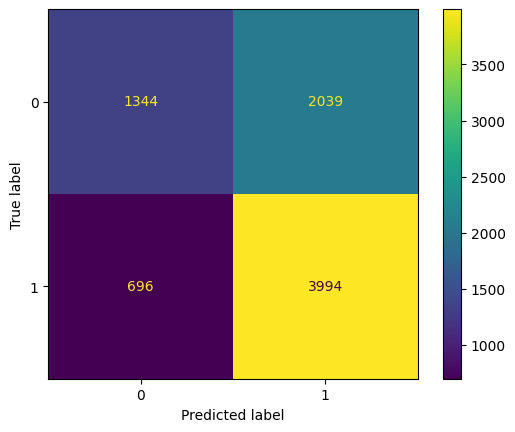

In [114]:
print(accuracy)
print(f_score)
confusion_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0, 1])
cm_display.plot()